<a href="https://colab.research.google.com/github/indriyatirs/NLP_Customer-Complain/blob/main/CustomerComplain_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama Machine Learning Intermediate: Membuat Model NLP dengan Tensorflow
- Nama: Indriyati Rahmi Setyani
- Email: indriyatirs@gmail.com
- Id Dicoding: indriyatirs
- Dataset: Customer Complaints Dataset for NLP
- Sumber: Kaggle

## Import & Understanding Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import zipfile, os

In [ ]:
!gdown 1QsGlxAln4tgq0n3nmZJcD-Jrdxatwlqk

Downloading...
From: https://drive.google.com/uc?id=1QsGlxAln4tgq0n3nmZJcD-Jrdxatwlqk
To: /content/customercomplain.zip
100% 20.8M/20.8M [00:00<00:00, 139MB/s]


In [ ]:
! unzip /content/customercomplain.zip

Archive:  /content/customercomplain.zip
replace complaints_processed.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('complaints_processed.csv')

In [ ]:
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
df.isnull().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

Dataset terdiri dari 3 kolom yaitu kolom Unnamed: 0, product dan narrative. Dari ketiga kolom tersebut terdapat 10 baris yang mengandung data null pada kolom narrative. Data null ini akan dihilangkan. Kemudian kolom yang akan digunakan pada proses NLP hanya kolom product dan narrative.

In [ ]:
df = df.dropna(subset=['narrative'])

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.shape

(162411, 2)

In [ ]:
df.describe()

,product,narrative
count,162411,162411
unique,5,124472
top,credit_reporting,victim identity notified collection creditor s...
freq,91172,739


In [ ]:
df['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

Dataframe yang digunakan memiliki sebanyak 162411 baris dan 2 kolom. Kolom product memiliki 5 kategori dan kategori yang paling sering muncul adalah credit_reporting sebanyak 91172 kali.

In [ ]:
# menampilkan salah satu teks plot dari film
print(df[df.index == 34881]['narrative'].values[0])

applied accepted capital one quicksilver credit card introductory interest rate month received statement still said interest applied safe paid full balance ensure would charged interest received statement confirmed full statement balance paid time yet still charged interest charge called query told must part term condition checked said term find reference


## Membuat Data Label

In [ ]:
category = pd.get_dummies(df['product'])
new_df = pd.concat([df, category],axis=1)
new_df = new_df.drop(columns=['product'])
new_df

,narrative,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,purchase order day shipping amount receive pro...,1,0,0,0,0
1,forwarded message date tue subject please inve...,1,0,0,0,0
2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1
3,payment history missing credit report speciali...,0,1,0,0,0
4,payment history missing credit report made mis...,0,1,0,0,0
...,...,...,...,...,...,...
162416,name,0,0,1,0,0
162417,name,1,0,0,0,0
162418,name,0,0,1,0,0
162419,name,1,0,0,0,0


In [ ]:
new_df.shape

(162411, 6)

## Membersihkan Stopwords dan Punctuation(tanda baca)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
new_df['narrative'] = new_df['narrative'].str.lower()

### Menghapus stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
new_df['desc'] = new_df['narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
new_df

,narrative,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,desc
0,purchase order day shipping amount receive pro...,1,0,0,0,0,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,1,0,0,0,0,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,0,1,0,0,0,payment history missing credit report speciali...
4,payment history missing credit report made mis...,0,1,0,0,0,payment history missing credit report made mis...
...,...,...,...,...,...,...,...
162416,name,0,0,1,0,0,name
162417,name,1,0,0,0,0,name
162418,name,0,0,1,0,0,name
162419,name,1,0,0,0,0,name


### Menghapus punctuation

In [ ]:
import string

In [ ]:
new_df['desc'] = new_df['desc'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

In [ ]:
new_df

,narrative,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,desc
0,purchase order day shipping amount receive pro...,1,0,0,0,0,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,1,0,0,0,0,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,0,1,0,0,0,payment history missing credit report speciali...
4,payment history missing credit report made mis...,0,1,0,0,0,payment history missing credit report made mis...
...,...,...,...,...,...,...,...
162416,name,0,0,1,0,0,name
162417,name,1,0,0,0,0,name
162418,name,0,0,1,0,0,name
162419,name,1,0,0,0,0,name


## Melakukan Spliting Data

In [ ]:
df['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
desc = new_df['desc'].values
prod = new_df[['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(desc, prod, test_size=0.2) #random_state=42

## Melakukan Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 2500

In [ ]:
tokenizer = Tokenizer(num_words=num_words, oov_token='XX')
tokenizer.fit_on_texts(X_train)

In [ ]:
sequences_X_train = tokenizer.texts_to_sequences(X_train)
sequences_X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
input_length = 150

In [ ]:
padded_X_train = pad_sequences(sequences_X_train, maxlen=input_length)
padded_X_test = pad_sequences(sequences_X_test, maxlen=input_length)

## Arsitektur Model

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
import numpy as np
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout,  Dense
from tensorflow.keras.regularizers import l1_l2, l2

In [ ]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Embedding(input_dim=num_words, output_dim=32, input_length=input_length),
   tf.keras.layers.SpatialDropout1D(0.01),
   tf.keras.layers.LSTM(64, kernel_regularizer=l2(0.02), recurrent_regularizer=l2(0.02), bias_regularizer=l2(0.02),
                        recurrent_dropout=0,
                        input_shape=(padded_X_train.shape[0], padded_X_train.shape[1]),
                        return_sequences=True),
   tf.keras.layers.Dropout(0.02),
   tf.keras.layers.LSTM(32),
   #tf.keras.layers.Dense(32),
   tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 32)           80000     
                                                                 
 spatial_dropout1d_4 (Spati  (None, 150, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_6 (LSTM)               (None, 150, 64)           24832     
                                                                 
 dropout_3 (Dropout)         (None, 150, 64)           0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.87):
      print("\nIterasi berhenti, akurasi model lebih dari 87%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
num_epochs = 100
history = model.fit(padded_X_train, y_train,
                    #batch_size=16,
                    epochs=num_epochs,
                    validation_data=(padded_X_test, y_test),
                    verbose=2, callbacks=[callbacks])

Epoch 1/100
4061/4061 - 106s - loss: 0.9816 - accuracy: 0.6746 - val_loss: 0.7517 - val_accuracy: 0.7102 - 106s/epoch - 26ms/step
Epoch 2/100
4061/4061 - 57s - loss: 0.6516 - accuracy: 0.7629 - val_loss: 0.5179 - val_accuracy: 0.8284 - 57s/epoch - 14ms/step
Epoch 3/100
4061/4061 - 56s - loss: 0.5433 - accuracy: 0.8240 - val_loss: 0.5286 - val_accuracy: 0.8277 - 56s/epoch - 14ms/step
Epoch 4/100
4061/4061 - 60s - loss: 0.4825 - accuracy: 0.8475 - val_loss: 0.5363 - val_accuracy: 0.8475 - 60s/epoch - 15ms/step
Epoch 5/100
4061/4061 - 56s - loss: 0.4357 - accuracy: 0.8609 - val_loss: 0.4261 - val_accuracy: 0.8582 - 56s/epoch - 14ms/step
Epoch 6/100
4061/4061 - 60s - loss: 0.4063 - accuracy: 0.8666 - val_loss: 0.4057 - val_accuracy: 0.8657 - 60s/epoch - 15ms/step
Epoch 7/100
4061/4061 - 55s - loss: 0.3952 - accuracy: 0.8684 - val_loss: 0.4015 - val_accuracy: 0.8639 - 55s/epoch - 14ms/step
Epoch 8/100
4061/4061 - 55s - loss: 0.3849 - accuracy: 0.8716 - val_loss: 0.3956 - val_accuracy: 0.868

In [ ]:
print(f"Train Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")

Train Accuracy: 0.8752924799919128
Validation Accuracy: 0.870116651058197


In [ ]:
import matplotlib.pyplot as plt

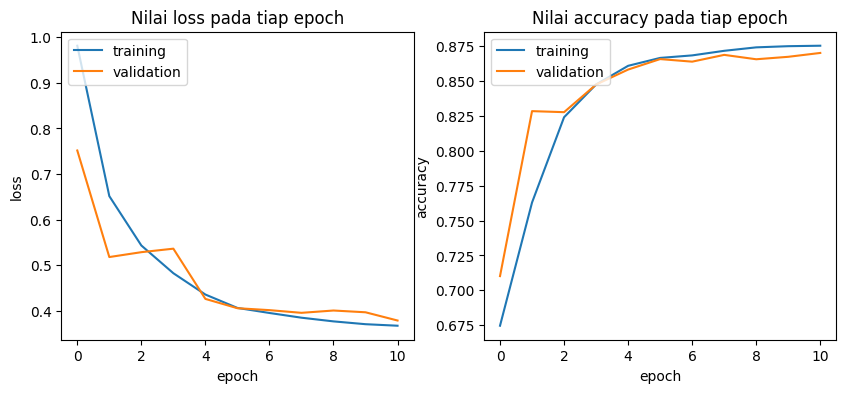

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])

ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[1].set_xlabel('epoch')
ax[0].set_title('Nilai loss pada tiap epoch')
ax[1].set_title('Nilai accuracy pada tiap epoch')
#ax[0].set_xticks(ticks=range(0, 24), labels=range(0,24))
#ax[1].set_xticks(ticks=range(0, 24), labels=range(0,24))

ax[0].legend(['training', 'validation'], loc='upper left')
ax[1].legend(['training', 'validation'], loc='upper left')
plt.show()

Nilai akurasi yang didapatkan pada model adalah 87%. Pada grafik loss dan accuracy juga menunjukkan bahwa model sudah cukup baik dan tidak mengalami overfitting.